In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from pylab import rcParams
from sklearn.linear_model import LinearRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix


In [2]:
import warnings
warnings.filterwarnings("ignore")

## 1. Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it. (5 Marks)

In [3]:
df1=pd.read_excel("C:\\Users\\archy\\Downloads\\Machine Learning\\Project ML\\Election_Data.xlsx")

In [4]:
df1.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [5]:
df1.shape

(1525, 10)

In [6]:
df1.describe()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [7]:
df1.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

*** Threre are no null values in the dataset***

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [9]:
df1 = df1.drop("Unnamed: 0", axis =1)

In [10]:
df1.rename(columns = {"economic.cond.national": "economic_cond_nation","economic.cond.household": "economic_cond_house","political.knowledge": "political_knowledge"},inplace=True)

In [11]:
df1.describe()

,age,economic_cond_nation,economic_cond_house,Blair,Hague,Europe,political_knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


## 2. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

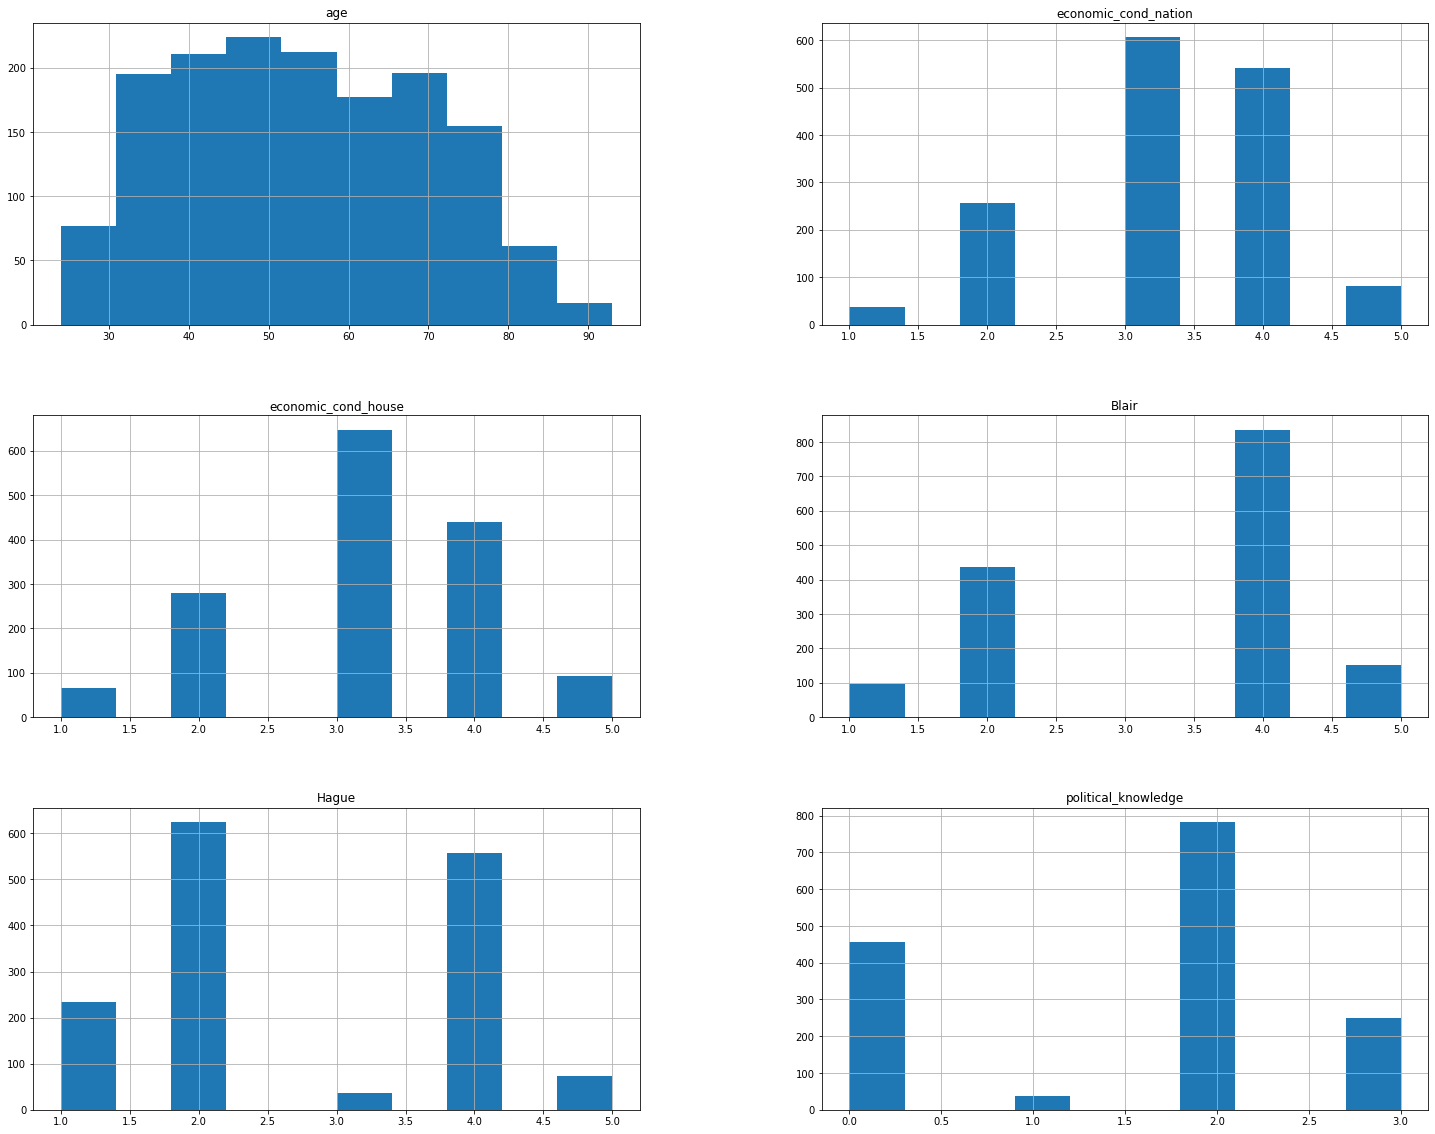

In [12]:
rcParams['figure.figsize'] = 25,20
df1[['age','economic_cond_nation','economic_cond_house','Blair','Hague','political_knowledge']].hist();

<AxesSubplot:xlabel='age'>

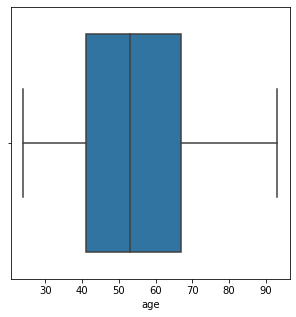

In [13]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df1['age'])   # box plot

<AxesSubplot:xlabel='economic_cond_house'>

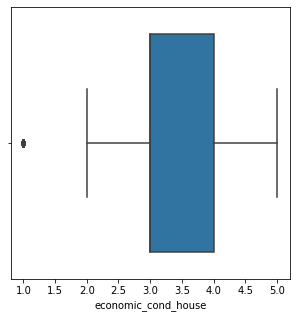

In [14]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df1['economic_cond_house'])

<AxesSubplot:xlabel='economic_cond_nation'>

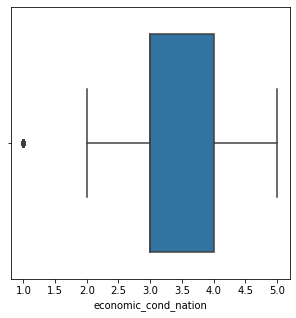

In [15]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df1['economic_cond_nation'])

<AxesSubplot:xlabel='Blair'>

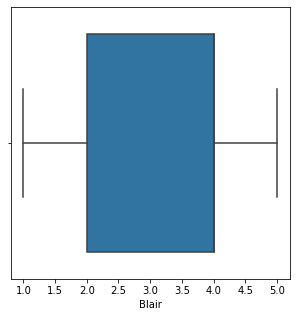

In [16]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df1['Blair'])

<AxesSubplot:xlabel='Hague'>

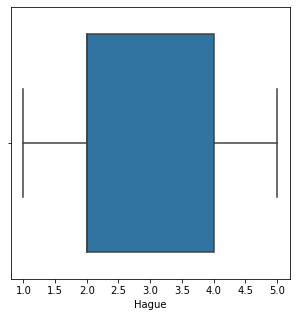

In [17]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df1['Hague'])

<AxesSubplot:xlabel='Europe'>

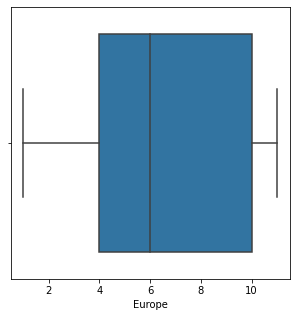

In [18]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df1['Europe'])

<AxesSubplot:xlabel='political_knowledge'>

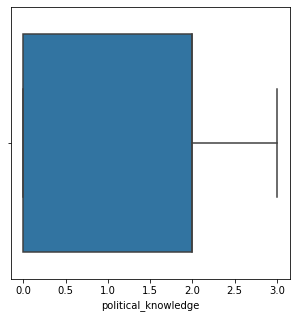

In [19]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df1['political_knowledge'])

***There are hardly any outliers in the dataset.*** 

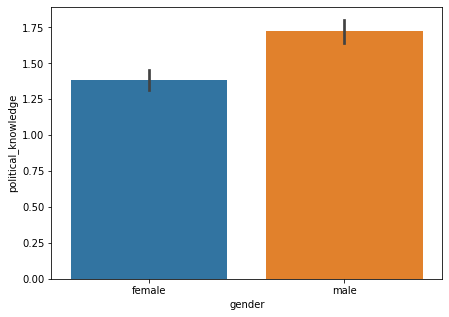

In [20]:
plt.figure(figsize=(7,5))
ax = sns.barplot(x="gender", y="political_knowledge", data=df1)

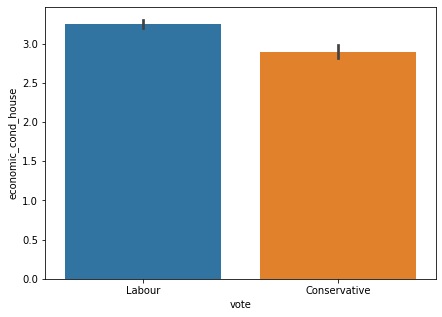

In [21]:
plt.figure(figsize=(7,5))

ax = sns.barplot(x='vote', y='economic_cond_house', data=df1)

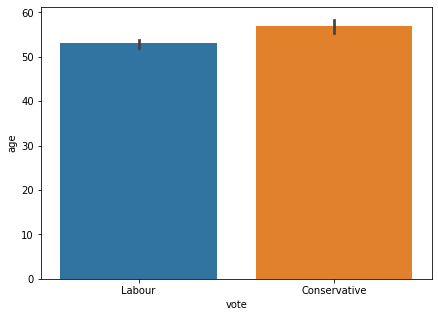

In [22]:
plt.figure(figsize=(7,5))

ax = sns.barplot(x='vote', y='age', data=df1)

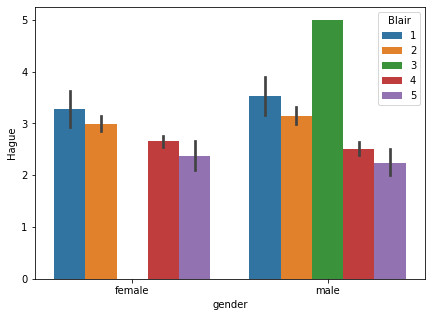

In [23]:
plt.figure(figsize=(7,5))

ax = sns.barplot(x='gender', y='Hague',hue = 'Blair', data=df1)

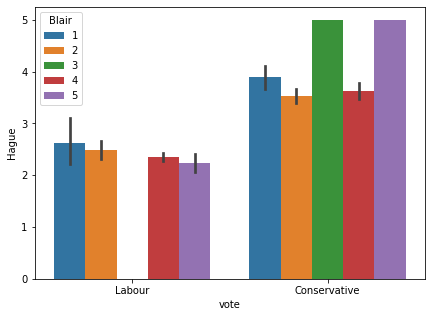

In [24]:
plt.figure(figsize=(7,5))

ax = sns.barplot(x='vote', y='Hague',hue = 'Blair', data=df1)

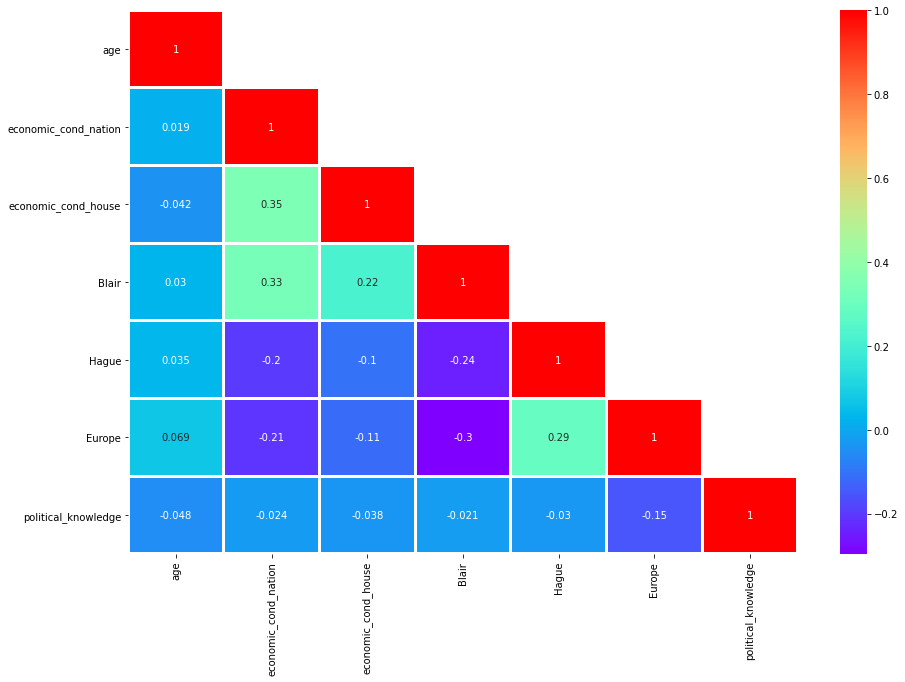

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),linewidths=2,
    linecolor='white', annot=True,cmap='rainbow',mask=np.triu(df1.corr(),+1));

**We can see that there are correlation in few variables.**

**Choosing Blair, depends on the Economic condition of Nation and Household.**

**Hague and Euroseptic sentiment has closer correlation.**

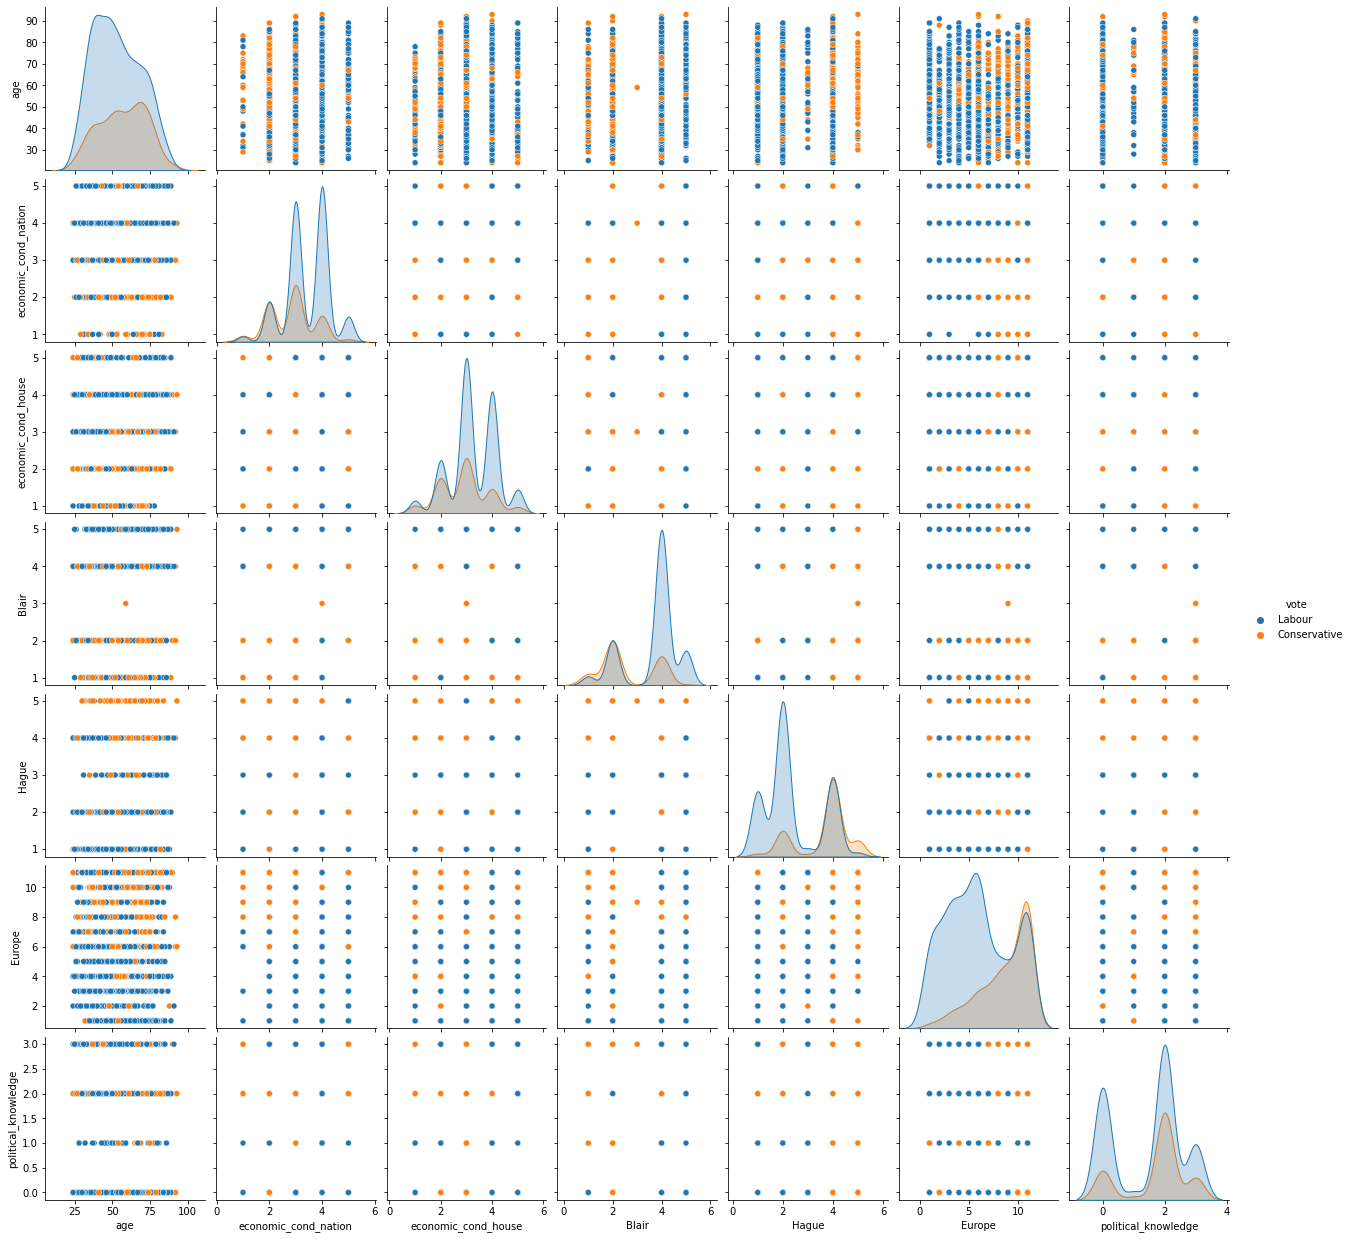

In [26]:
sns.pairplot(data = df1, hue='vote');






































## Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [27]:
for column in df1.columns:
    if df1[column].dtype == 'object':
        print(column.upper(),': ',df1[column].nunique())
        print(df1[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




#df1 = pd.get_dummies(df1, columns=['vote'])
for column in df1.columns:
    if df1[column].dtype != 'object':
        print(column.upper(),': ',df1[column].nunique())
        print(df1[column].value_counts().sort_values())
        print('\n')

In [28]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df1[feature].unique()))
        print(pd.Categorical(df1[feature].unique()).codes)
        df1[feature] = pd.Categorical(df1[feature]).codes



feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [29]:
df1 = pd.get_dummies(df1,columns = ["economic_cond_nation","economic_cond_house","Blair","Hague","Europe","political_knowledge"],drop_first =True)

In [30]:
df1.head()

,vote,age,gender,economic_cond_nation_2,economic_cond_nation_3,economic_cond_nation_4,economic_cond_nation_5,economic_cond_house_2,economic_cond_house_3,economic_cond_house_4,...,Europe_5,Europe_6,Europe_7,Europe_8,Europe_9,Europe_10,Europe_11,political_knowledge_1,political_knowledge_2,political_knowledge_3
0,1,43,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,36,1,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,1,35,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,24,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,41,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [31]:
df1.shape

(1525, 32)

In [32]:
df1.describe()

,vote,age,gender,economic_cond_nation_2,economic_cond_nation_3,economic_cond_nation_4,economic_cond_nation_5,economic_cond_house_2,economic_cond_house_3,economic_cond_house_4,...,Europe_5,Europe_6,Europe_7,Europe_8,Europe_9,Europe_10,Europe_11,political_knowledge_1,political_knowledge_2,political_knowledge_3
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,...,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,0.697049,54.182295,0.467541,0.168525,0.398033,0.355410,0.053770,0.183607,0.424918,0.288525,...,0.081311,0.137049,0.056393,0.073443,0.072787,0.066230,0.221639,0.024918,0.512787,0.163934
std,0.459685,15.711209,0.499109,0.374454,0.489653,0.478794,0.225638,0.387290,0.494493,0.453225,...,0.273403,0.344012,0.230756,0.260947,0.259872,0.248764,0.415486,0.155926,0.500000,0.370338
min,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,67.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   vote                    1525 non-null   int8 
 1   age                     1525 non-null   int64
 2   gender                  1525 non-null   int8 
 3   economic_cond_nation_2  1525 non-null   uint8
 4   economic_cond_nation_3  1525 non-null   uint8
 5   economic_cond_nation_4  1525 non-null   uint8
 6   economic_cond_nation_5  1525 non-null   uint8
 7   economic_cond_house_2   1525 non-null   uint8
 8   economic_cond_house_3   1525 non-null   uint8
 9   economic_cond_house_4   1525 non-null   uint8
 10  economic_cond_house_5   1525 non-null   uint8
 11  Blair_2                 1525 non-null   uint8
 12  Blair_3                 1525 non-null   uint8
 13  Blair_4                 1525 non-null   uint8
 14  Blair_5                 1525 non-null   uint8
 15  Hague_2              

***We will not do the scaling.***

In [34]:
df1["vote"].value_counts()

1    1063
0     462
Name: vote, dtype: int64

In [35]:
X= df1.drop('vote',axis=1)


In [36]:
Y=df1[['vote']]

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size =0.30,random_state =1,stratify=Y)

In [38]:
print('Training set shape for the independent variables:',X_train.shape)
print('Training set shape for the dependent variable:',Y_train.shape)
print('Testing set shape for the independent variables:',X_test.shape)
print('Testing set shape for the dependent variable:',Y_test.shape)

Training set shape for the independent variables: (1067, 31)
Training set shape for the dependent variable: (1067, 1)
Testing set shape for the independent variables: (458, 31)
Testing set shape for the dependent variable: (458, 1)


In [39]:
Y_train.value_counts()

vote
1       744
0       323
dtype: int64

In [40]:
Y_test.value_counts()

vote
1       319
0       139
dtype: int64

## Modelling: 26 marks
***1. Apply Logistic Regression and LDA (linear discriminant analysis). (5 marks)***

***2. Apply KNN Model and Naïve Bayes Model. Interpret the results. (7 marks)***

***3. Model Tuning, Bagging (Random Forest should be applied for Bagging) and Boosting. (7 marks)***

***4. Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)***

### Logistic Regression Model

In [41]:
model_LR = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model_LR.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [42]:
ytrain_predict_LR = model_LR.predict(X_train)
ytest_predict_LR = model_LR.predict(X_test)

In [43]:
ytrain_predict_prob_LR=model_LR.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_LR).head()

,0,1
0,0.075148,0.924852
1,0.267330,0.732670
2,0.087520,0.912480
3,0.080913,0.919087
4,0.017789,0.982211


In [44]:
ytest_predict_prob_LR=model_LR.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_LR).head()

,0,1
0,0.230626,0.769374
1,0.024962,0.975038
2,0.060573,0.939427
3,0.364819,0.635181
4,0.001501,0.998499


In [45]:
acc_LR_train = model_LR.score(X_train,Y_train)
acc_LR_train

0.8425492033739457

In [46]:
acc_LR_test=model_LR.score(X_test,Y_test)
acc_LR_test

0.8296943231441049

AUC for the Training Data: 0.894
AUC for the Test Data: 0.909


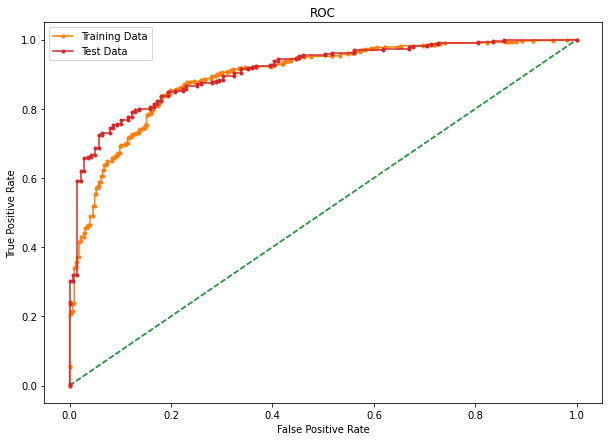

In [47]:
plt.figure(figsize=(10,7))
auc_lr_train = metrics.roc_auc_score(Y_train,ytrain_predict_prob_LR[:,1])
print('AUC for the Training Data: %.3f' % auc_lr_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_train,ytrain_predict_prob_LR[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
auc_lr_test = metrics.roc_auc_score(Y_test,ytest_predict_prob_LR[:,1])
print('AUC for the Test Data: %.3f' % auc_lr_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
fpr, tpr, thresholds = metrics.roc_curve(Y_test,ytest_predict_prob_LR[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()


plt.figure(figsize=(10,7))
probs_LR = model_LR.predict_proba(X_train)
#keep probabilities for the positive outcome only
probs_LR = probs_LR[:, 1]
#calculate AUC
auc = roc_auc_score(Y_train, probs_LR)
print('AUC: %.3f' % auc)
#calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs_LR)
plt.plot([0, 1], [0, 1], linestyle='--')
#plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

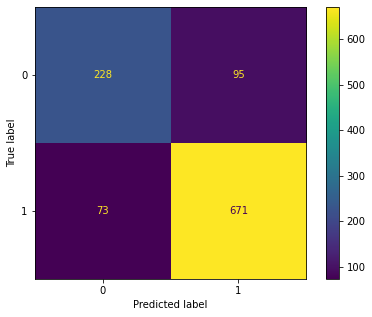

In [48]:
fig, ax = plt.subplots(figsize=(7,5))
plot_confusion_matrix(model_LR,X_train,Y_train, ax=ax);

In [49]:
confusion_matrix(Y_train, ytrain_predict_LR)

array([[228,  95],
       [ 73, 671]], dtype=int64)

In [50]:
print(classification_report(Y_train, ytrain_predict_LR),'\n')

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       323
           1       0.88      0.90      0.89       744

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 



In [51]:
log_reg_train=classification_report(Y_train, ytrain_predict_LR,output_dict=True)
df=pd.DataFrame(log_reg_train).transpose()
log_reg_train_precision=round(df.loc["1"][0],2)
log_reg_train_recall=round(df.loc["1"][1],2)
log_reg_train_f1=round(df.loc["1"][2],2)
print ('log_reg_train_precision ',log_reg_train_precision)
print ('log_reg_train_recall ',log_reg_train_recall)
print ('log_reg_train_f1 ',log_reg_train_f1)

log_reg_train_precision  0.88
log_reg_train_recall  0.9
log_reg_train_f1  0.89


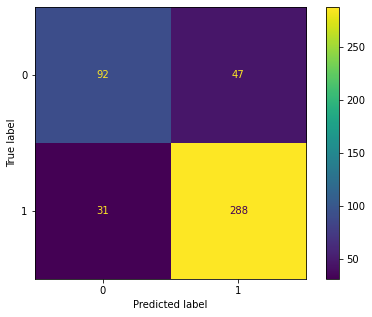

In [52]:
fig, ax = plt.subplots(figsize=(7,5))
plot_confusion_matrix(model_LR,X_test,Y_test, ax=ax);

In [53]:
confusion_matrix(Y_test, ytest_predict_LR)

array([[ 92,  47],
       [ 31, 288]], dtype=int64)

fig, ax = plt.subplots(figsize=(7,5))

plot_confusion_matrix(model_LR,X_test,Y_test,ax=ax,cmap=plt.cm.Blues);


In [54]:
print(classification_report(Y_test, ytest_predict_LR),'\n')

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       139
           1       0.86      0.90      0.88       319

    accuracy                           0.83       458
   macro avg       0.80      0.78      0.79       458
weighted avg       0.83      0.83      0.83       458
 



In [55]:
log_reg_test=classification_report(Y_test, ytest_predict_LR,output_dict=True)
df=pd.DataFrame(log_reg_test).transpose()
log_reg_test_precision=round(df.loc["1"][0],2)
log_reg_test_recall=round(df.loc["1"][1],2)
log_reg_test_f1=round(df.loc["1"][2],2)
print ('log_reg_test_precision ',log_reg_test_precision)
print ('log_reg_test_recall ',log_reg_test_recall)
print ('log_reg_test_f1 ',log_reg_test_f1)

log_reg_test_precision  0.86
log_reg_test_recall  0.9
log_reg_test_f1  0.88


###  Linear Discriminant Analysis

In [56]:
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [57]:
ytrain_predict_LDA = model_LDA.predict(X_train)
ytest_predict_LDA = model_LDA.predict(X_test)

In [58]:
ytrain_predict_prob_LDA=model_LDA.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_LDA).head()

,0,1
0,0.040579,0.959421
1,0.216927,0.783073
2,0.048343,0.951657
3,0.136454,0.863546
4,0.010366,0.989634


In [59]:
ytest_predict_prob_LDA=model_LDA.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_LDA).head()

,0,1
0,0.209741,0.790259
1,0.080271,0.919729
2,0.077219,0.922781
3,0.354521,0.645479
4,0.009263,0.990737


In [60]:
acc_LDA_train=model_LDA.score(X_train,Y_train)
acc_LDA_train

0.8388003748828491

In [61]:
acc_LDA_test=model_LDA.score(X_test,Y_test)
acc_LDA_test

0.834061135371179

AUC for the Training Data: 0.887
AUC for the Test Data: 0.917


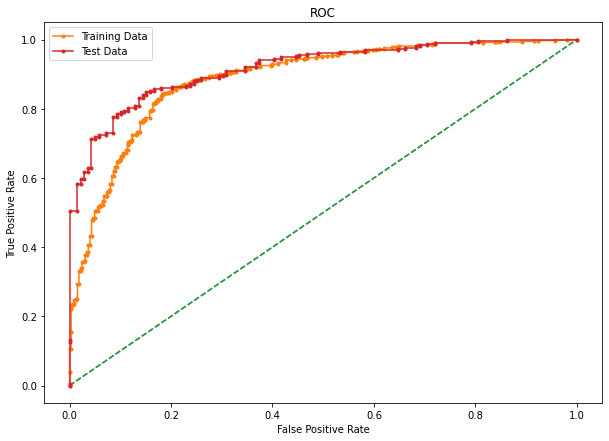

In [62]:
plt.figure(figsize=(10,7))
auc_lda_train = metrics.roc_auc_score(Y_train,ytrain_predict_prob_LDA[:,1])
print('AUC for the Training Data: %.3f' % auc_lda_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_train,ytrain_predict_prob_LDA[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
auc_lda_test = metrics.roc_auc_score(Y_test,ytest_predict_prob_LDA[:,1])
print('AUC for the Test Data: %.3f' % auc_lda_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
fpr, tpr, thresholds = metrics.roc_curve(Y_test,ytest_predict_prob_LDA[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()

In [63]:
confusion_matrix(Y_train, ytrain_predict_LDA)

array([[228,  95],
       [ 77, 667]], dtype=int64)

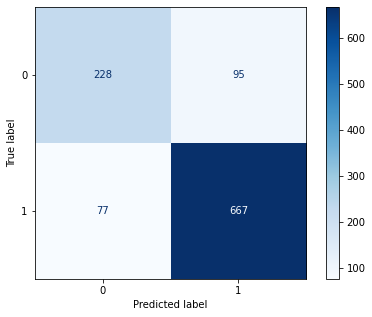

In [64]:
fig, ax = plt.subplots(figsize=(7,5))

plot_confusion_matrix(model_LDA,X_train,Y_train,ax=ax,cmap=plt.cm.Blues);


In [65]:
print(classification_report(Y_train, ytrain_predict_LDA),'\n')

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       323
           1       0.88      0.90      0.89       744

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 



In [66]:
lin_dis_train=classification_report(Y_train, ytrain_predict_LDA,output_dict=True)
df=pd.DataFrame(lin_dis_train).transpose()
lin_dis_train_precision=round(df.loc["1"][0],2)
lin_dis_train_recall=round(df.loc["1"][1],2)
lin_dis_train_f1=round(df.loc["1"][2],2)
print ('lin_dis_train_precision ',lin_dis_train_precision)
print ('lin_dis_train_recall ',lin_dis_train_recall)
print ('lin_dis_train_f1 ',lin_dis_train_f1)

lin_dis_train_precision  0.88
lin_dis_train_recall  0.9
lin_dis_train_f1  0.89


In [67]:
confusion_matrix(Y_test, ytest_predict_LDA)

array([[ 97,  42],
       [ 34, 285]], dtype=int64)

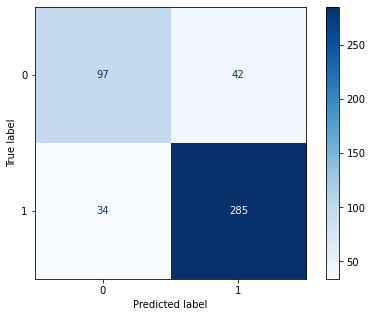

In [68]:
fig, ax = plt.subplots(figsize=(7,5))

plot_confusion_matrix(model_LDA,X_test,Y_test,ax=ax,cmap=plt.cm.Blues);


In [69]:
print(classification_report(Y_test, ytest_predict_LDA),'\n')

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       139
           1       0.87      0.89      0.88       319

    accuracy                           0.83       458
   macro avg       0.81      0.80      0.80       458
weighted avg       0.83      0.83      0.83       458
 



In [70]:
lin_dis_test=classification_report(Y_test, ytest_predict_LDA,output_dict=True)
df=pd.DataFrame(lin_dis_test).transpose()
lin_dis_test_precision=round(df.loc["1"][0],2)
lin_dis_test_recall=round(df.loc["1"][1],2)
lin_dis_test_f1=round(df.loc["1"][2],2)
print ('lin_dis_test_precision ',lin_dis_test_precision)
print ('lin_dis_test_recall ',lin_dis_test_recall)
print ('lin_dis_test_f1 ',lin_dis_test_f1)

lin_dis_test_precision  0.87
lin_dis_test_recall  0.89
lin_dis_test_f1  0.88


### KNN model

In [71]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN=KNeighborsClassifier( n_neighbors=3,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',)
model_KNN.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [72]:
ytrain_predict_KNN = model_KNN.predict(X_train)
ytest_predict_KNN = model_KNN.predict(X_test)

In [73]:
ytrain_predict_prob_KNN=model_KNN.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_KNN).head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [74]:
ytest_predict_prob_KNN=model_KNN.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_KNN).head()

,0,1
0,0.333333,0.666667
1,0.000000,1.000000
2,0.333333,0.666667
3,0.666667,0.333333
4,0.000000,1.000000


In [75]:
KNN_acc_train=model_KNN.score(X_train,Y_train)
KNN_acc_train

0.8547328959700093

In [76]:
KNN_acc_test=model_KNN.score(X_test,Y_test)
KNN_acc_test

0.7379912663755459

AUC for the Training Data: 0.919
AUC for the Test Data: 0.735


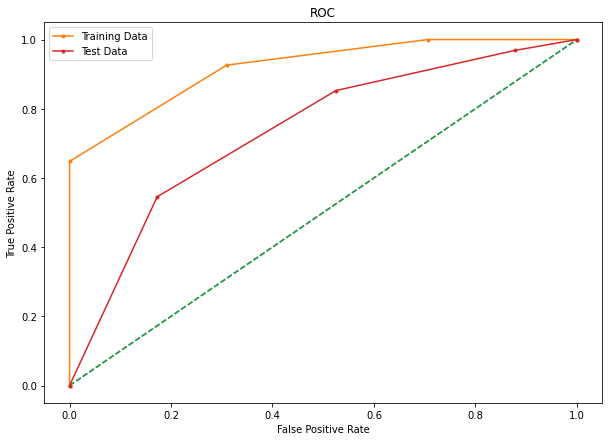

In [77]:
plt.figure(figsize=(10,7))
auc_KNN_train = metrics.roc_auc_score(Y_train,ytrain_predict_prob_KNN[:,1])
print('AUC for the Training Data: %.3f' % auc_KNN_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_train,ytrain_predict_prob_KNN[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
auc_KNN_test = metrics.roc_auc_score(Y_test,ytest_predict_prob_KNN[:,1])
print('AUC for the Test Data: %.3f' % auc_KNN_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
fpr, tpr, thresholds = metrics.roc_curve(Y_test,ytest_predict_prob_KNN[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()


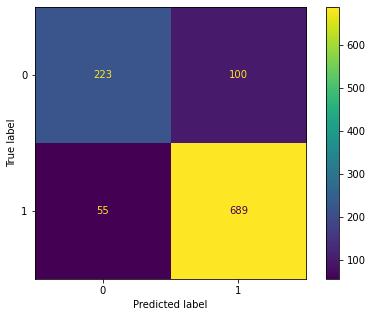

In [78]:
#Confusion matrix and classification matrix
fig, ax = plt.subplots(figsize=(7,5))
plot_confusion_matrix(model_KNN,X_train,Y_train, ax=ax);

In [79]:
confusion_matrix(Y_train, ytrain_predict_KNN)


array([[223, 100],
       [ 55, 689]], dtype=int64)

In [80]:
print(classification_report(Y_train, ytrain_predict_KNN),'\n')

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       323
           1       0.87      0.93      0.90       744

    accuracy                           0.85      1067
   macro avg       0.84      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067
 



In [81]:
KNN_train=classification_report(Y_train, ytrain_predict_KNN,output_dict=True)
df=pd.DataFrame(KNN_train).transpose()
KNN_train_precision=round(df.loc["1"][0],2)
KNN_train_recall=round(df.loc["1"][1],2)
KNN_train_f1=round(df.loc["1"][2],2)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_precision  0.87
KNN_train_recall  0.93
KNN_train_f1  0.9


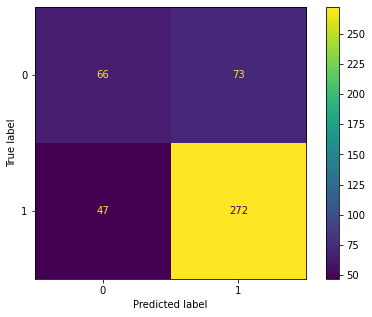

In [82]:
fig, ax = plt.subplots(figsize=(7,5))
plot_confusion_matrix(model_KNN,X_test,Y_test, ax=ax);

In [83]:
confusion_matrix(Y_test, ytest_predict_KNN)


array([[ 66,  73],
       [ 47, 272]], dtype=int64)

In [84]:
print(classification_report(Y_test, ytest_predict_KNN),'\n')

              precision    recall  f1-score   support

           0       0.58      0.47      0.52       139
           1       0.79      0.85      0.82       319

    accuracy                           0.74       458
   macro avg       0.69      0.66      0.67       458
weighted avg       0.73      0.74      0.73       458
 



In [85]:
KNN_test=classification_report(Y_test, ytest_predict_KNN,output_dict=True)
df=pd.DataFrame(KNN_test).transpose()
KNN_test_precision=round(df.loc["1"][0],2)
KNN_test_recall=round(df.loc["1"][1],2)
KNN_test_f1=round(df.loc["1"][2],2)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_precision  0.79
KNN_test_recall  0.85
KNN_test_f1  0.82


### Naïve Bayes Model

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [87]:
model_NB = GaussianNB()
model_NB.fit(X_train, Y_train)

GaussianNB()

In [88]:
ytrain_predict_NB = model_NB.predict(X_train)
ytest_predict_NB = model_NB.predict(X_test)

In [89]:
ytrain_predict_prob_NB=model_NB.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_NB).head()

,0,1
0,5.730894e-05,0.999943
1,6.993339e-07,0.999999
2,3.194668e-03,0.996805
3,7.353508e-05,0.999926
4,4.003271e-16,1.000000


In [90]:
ytest_predict_prob_NB=model_NB.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_NB).head()

,0,1
0,3.859559e-01,0.614044
1,2.695020e-33,1.000000
2,1.128017e-05,0.999989
3,1.039865e-11,1.000000
4,7.303499e-42,1.000000


In [91]:
NB_acc_train=model_NB.score(X_train,Y_train)
NB_acc_train

0.7863167760074976

In [92]:
NB_acc_test=model_NB.score(X_test,Y_test)
NB_acc_test

0.7925764192139738

AUC for the Training Data: 0.830
AUC for the Test Data: 0.850


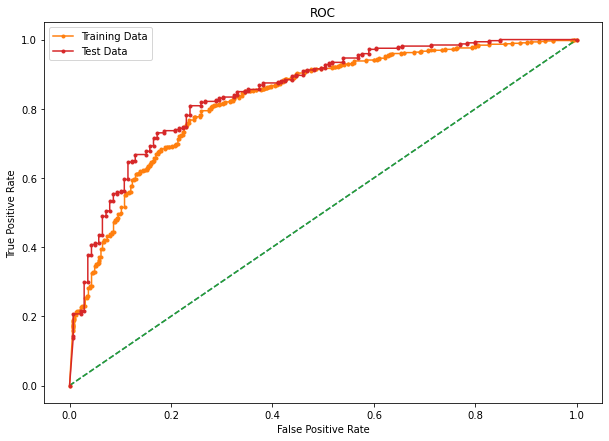

In [93]:
plt.figure(figsize=(10,7))
auc_NB_train = metrics.roc_auc_score(Y_train,ytrain_predict_prob_NB[:,1])
print('AUC for the Training Data: %.3f' % auc_NB_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_train,ytrain_predict_prob_NB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
auc_NB_test = metrics.roc_auc_score(Y_test,ytest_predict_prob_NB[:,1])
print('AUC for the Test Data: %.3f' % auc_NB_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
fpr, tpr, thresholds = metrics.roc_curve(Y_test,ytest_predict_prob_NB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()


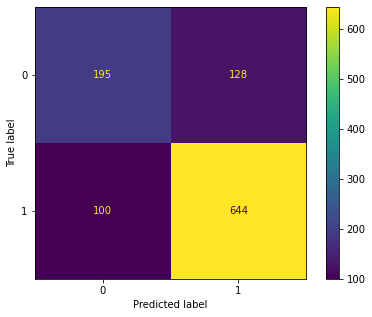

In [94]:
fig, ax = plt.subplots(figsize=(7,5))
plot_confusion_matrix(model_NB,X_train,Y_train, ax=ax);

In [95]:
confusion_matrix(Y_train, ytrain_predict_NB)


array([[195, 128],
       [100, 644]], dtype=int64)

In [96]:
print(classification_report(Y_train, ytrain_predict_NB),'\n')

              precision    recall  f1-score   support

           0       0.66      0.60      0.63       323
           1       0.83      0.87      0.85       744

    accuracy                           0.79      1067
   macro avg       0.75      0.73      0.74      1067
weighted avg       0.78      0.79      0.78      1067
 



In [97]:
NB_train=classification_report(Y_train, ytrain_predict_NB,output_dict=True)
df=pd.DataFrame(NB_train).transpose()
NB_train_precision=round(df.loc["1"][0],2)
NB_train_recall=round(df.loc["1"][1],2)
NB_train_f1=round(df.loc["1"][2],2)
print ('NB_train_precision ',NB_train_precision)
print ('NB_train_recall ',NB_train_recall)
print ('NB_train_f1 ',NB_train_f1)

NB_train_precision  0.83
NB_train_recall  0.87
NB_train_f1  0.85


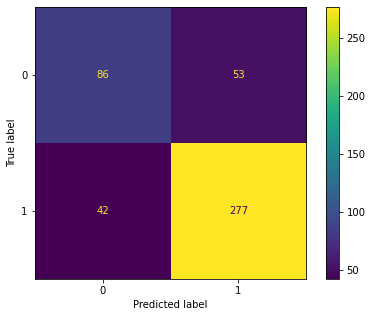

In [98]:
fig, ax = plt.subplots(figsize=(7,5))
plot_confusion_matrix(model_NB,X_test,Y_test, ax=ax);

In [99]:
confusion_matrix(Y_test, ytest_predict_NB)


array([[ 86,  53],
       [ 42, 277]], dtype=int64)

In [100]:
print(classification_report(Y_test, ytest_predict_NB),'\n')

              precision    recall  f1-score   support

           0       0.67      0.62      0.64       139
           1       0.84      0.87      0.85       319

    accuracy                           0.79       458
   macro avg       0.76      0.74      0.75       458
weighted avg       0.79      0.79      0.79       458
 



In [101]:
NB_test=classification_report(Y_test, ytest_predict_NB,output_dict=True)
df=pd.DataFrame(NB_test).transpose()
NB_test_precision=round(df.loc["1"][0],2)
NB_test_recall=round(df.loc["1"][1],2)
NB_test_f1=round(df.loc["1"][2],2)
print ('NB_test_precision ',NB_test_precision)
print ('NB_test_recall ',NB_test_recall)
print ('NB_test_f1 ',NB_test_f1)

NB_test_precision  0.84
NB_test_recall  0.87
NB_test_f1  0.85


### Bagging with Random forest.

In [102]:
#Calling the random forest model
from sklearn.ensemble import RandomForestClassifier

rfcl=RandomForestClassifier()
param_grid = {
    "max_depth":[10,20,30],
    "max_features" : [15,12,7],
    "min_samples_split":[3,5,7],
    'n_estimators':[500,1000],'random_state':[1]}
#model_RF.fit(X_train, Y_train)
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [103]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30], 'max_features': [15, 12, 7],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [500, 1000], 'random_state': [1]})

In [104]:
model_RF=grid_search.best_estimator_

In [105]:
model_RF

RandomForestClassifier(max_depth=10, max_features=15, min_samples_split=7,
                       n_estimators=1000, random_state=1)

In [106]:
# Using bagging classifier with random forest as base estimator
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator = model_RF,n_estimators=20, max_features=1.0,
            random_state=1) #BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, Y_train)

In [107]:
ytrain_predict_bgcl = bgcl.predict(X_train)
ytest_predict_bgcl = bgcl.predict(X_test)

In [108]:
ytrain_predict_prob_bgcl=model_RF.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_bgcl).head()

,0,1
0,0.015802,0.984198
1,0.179553,0.820447
2,0.184668,0.815332
3,0.125148,0.874852
4,0.018608,0.981392


In [109]:
ytest_predict_prob_bgcl=model_RF.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_bgcl).head()

,0,1
0,0.153797,0.846203
1,0.210605,0.789395
2,0.172441,0.827559
3,0.307237,0.692763
4,0.008370,0.991630


In [110]:
bgcl_acc_train=bgcl.score(X_train,Y_train)
bgcl_acc_train

0.8847235238987816

In [111]:
bgcl_acc_test=bgcl.score(X_test,Y_test)
bgcl_acc_test

0.8318777292576419

AUC for the Training Data: 0.976
AUC for the Test Data: 0.900


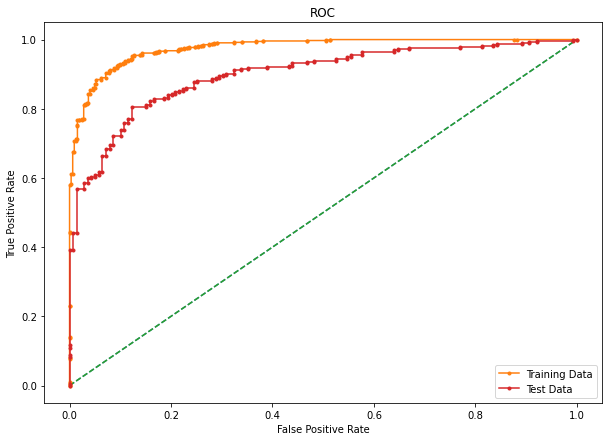

In [112]:
plt.figure(figsize=(10,7))
auc_bgcl_train = metrics.roc_auc_score(Y_train,ytrain_predict_prob_bgcl[:,1])
print('AUC for the Training Data: %.3f' % auc_bgcl_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_train,ytrain_predict_prob_bgcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
auc_bgcl_test = metrics.roc_auc_score(Y_test,ytest_predict_prob_bgcl[:,1])
print('AUC for the Test Data: %.3f' % auc_bgcl_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
fpr, tpr, thresholds = metrics.roc_curve(Y_test,ytest_predict_prob_bgcl[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()


In [113]:
print(classification_report(Y_train, ytrain_predict_bgcl),'\n')

              precision    recall  f1-score   support

           0       0.86      0.73      0.79       323
           1       0.89      0.95      0.92       744

    accuracy                           0.88      1067
   macro avg       0.88      0.84      0.86      1067
weighted avg       0.88      0.88      0.88      1067
 



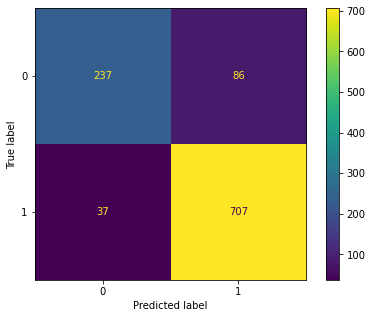

In [114]:
fig, ax = plt.subplots(figsize=(7,5))
plot_confusion_matrix(bgcl,X_train,Y_train, ax=ax);

In [115]:
bgcl_train=classification_report(Y_train, ytrain_predict_bgcl,output_dict=True)
df=pd.DataFrame(bgcl_train).transpose()
bgcl_train_precision=round(df.loc["1"][0],2)
bgcl_train_recall=round(df.loc["1"][1],2)
bgcl_train_f1=round(df.loc["1"][2],2)
print ('bgcl_train_precision ',bgcl_train_precision)
print ('bgcl_train_recall ',bgcl_train_recall)
print ('bgcl_train_f1 ',bgcl_train_f1)

bgcl_train_precision  0.89
bgcl_train_recall  0.95
bgcl_train_f1  0.92


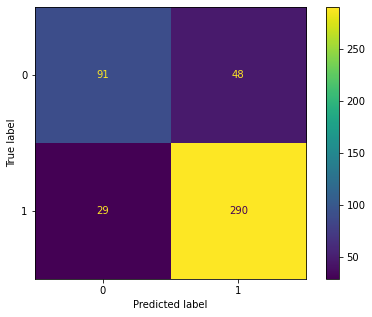

In [116]:
fig, ax = plt.subplots(figsize=(7,5))
plot_confusion_matrix(bgcl,X_test,Y_test, ax=ax);

In [117]:
print(classification_report(Y_test, ytest_predict_bgcl),'\n')

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       139
           1       0.86      0.91      0.88       319

    accuracy                           0.83       458
   macro avg       0.81      0.78      0.79       458
weighted avg       0.83      0.83      0.83       458
 



In [118]:
bgcl_test=classification_report(Y_test, ytest_predict_bgcl,output_dict=True)
df=pd.DataFrame(bgcl_test).transpose()
bgcl_test_precision=round(df.loc["1"][0],2)
bgcl_test_recall=round(df.loc["1"][1],2)
bgcl_test_f1=round(df.loc["1"][2],2)
print ('bgcl_test_precision ',bgcl_test_precision)
print ('bgcl_test_recall ',bgcl_test_recall)
print ('bgcl_test_f1 ',bgcl_test_f1)

bgcl_test_precision  0.86
bgcl_test_recall  0.91
bgcl_test_f1  0.88


### AdaBoost

In [120]:
from sklearn.ensemble import AdaBoostClassifier

model_ADB = AdaBoostClassifier(n_estimators=1000,learning_rate = 1,random_state=1)
model_ADB.fit(X_train,Y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=1000, random_state=1)

In [121]:
ytrain_predict_ADB= model_ADB.predict(X_train)
ytest_predict_ADB = model_ADB.predict(X_test)

In [122]:
ytrain_predict_prob_ADB=model_ADB.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_ADB).head()

,0,1
0,0.499094,0.500906
1,0.499589,0.500411
2,0.499263,0.500737
3,0.499397,0.500603
4,0.498795,0.501205


In [123]:
ytest_predict_prob_ADB=model_ADB.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_ADB).head()

,0,1
0,0.499760,0.500240
1,0.498587,0.501413
2,0.498944,0.501056
3,0.499998,0.500002
4,0.497776,0.502224


In [124]:
ADB_acc_train=model_ADB.score(X_train,Y_train)
ADB_acc_train

0.8444236176194939

In [125]:
ADB_acc_test=model_ADB.score(X_test,Y_test)
ADB_acc_test

0.8034934497816594

AUC for the Training Data: 0.908
AUC for the Test Data: 0.888


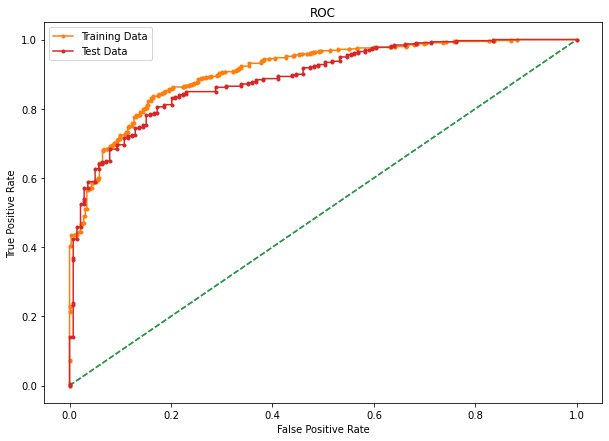

In [126]:
plt.figure(figsize=(10,7))
auc_ADB_train = metrics.roc_auc_score(Y_train,ytrain_predict_prob_ADB[:,1])
print('AUC for the Training Data: %.3f' % auc_ADB_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_train,ytrain_predict_prob_ADB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
auc_ADB_test = metrics.roc_auc_score(Y_test,ytest_predict_prob_ADB[:,1])
print('AUC for the Test Data: %.3f' % auc_ADB_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
fpr, tpr, thresholds = metrics.roc_curve(Y_test,ytest_predict_prob_ADB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()


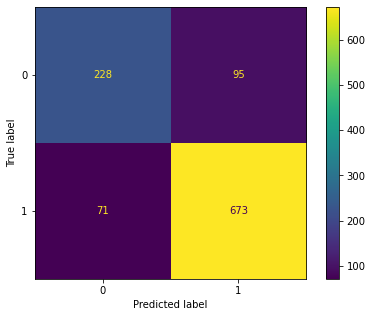

In [127]:
fig, ax = plt.subplots(figsize=(7,5))
plot_confusion_matrix(model_ADB,X_train,Y_train, ax=ax);

In [128]:
confusion_matrix(Y_train, ytrain_predict_ADB)


array([[228,  95],
       [ 71, 673]], dtype=int64)

In [129]:
print(classification_report(Y_train, ytrain_predict_ADB),'\n')

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       323
           1       0.88      0.90      0.89       744

    accuracy                           0.84      1067
   macro avg       0.82      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 



In [130]:
ADB_train=classification_report(Y_train, ytrain_predict_ADB,output_dict=True)
df=pd.DataFrame(ADB_train).transpose()
ADB_train_precision=round(df.loc["1"][0],2)
ADB_train_recall=round(df.loc["1"][1],2)
ADB_train_f1=round(df.loc["1"][2],2)
print ('ADB_train_precision ',ADB_train_precision)
print ('ADB_train_recall ',ADB_train_recall)
print ('ADB_train_f1 ',ADB_train_f1)

ADB_train_precision  0.88
ADB_train_recall  0.9
ADB_train_f1  0.89


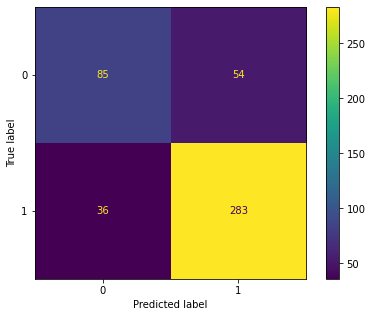

In [131]:
fig, ax = plt.subplots(figsize=(7,5))
plot_confusion_matrix(model_ADB,X_test,Y_test, ax=ax);

In [132]:
confusion_matrix(Y_test, ytest_predict_ADB)


array([[ 85,  54],
       [ 36, 283]], dtype=int64)

In [133]:
print(classification_report(Y_test, ytest_predict_ADB),'\n')

              precision    recall  f1-score   support

           0       0.70      0.61      0.65       139
           1       0.84      0.89      0.86       319

    accuracy                           0.80       458
   macro avg       0.77      0.75      0.76       458
weighted avg       0.80      0.80      0.80       458
 



In [134]:
ADB_test=classification_report(Y_test, ytest_predict_ADB,output_dict=True)
df=pd.DataFrame(ADB_test).transpose()
ADB_test_precision=round(df.loc["1"][0],2)
ADB_test_recall=round(df.loc["1"][1],2)
ADB_test_f1=round(df.loc["1"][2],2)
print ('ADB_test_precision ',ADB_test_precision)
print ('ADB_test_recall ',ADB_test_recall)
print ('ADB_test_f1 ',ADB_test_f1)

ADB_test_precision  0.84
ADB_test_recall  0.89
ADB_test_f1  0.86


### Gradient Boost

In [135]:
from sklearn.ensemble import GradientBoostingClassifier
model_GB = GradientBoostingClassifier(random_state=1)
model_GB = model_GB.fit(X_train, Y_train)

In [136]:
ytrain_predict_GB= model_GB.predict(X_train)
ytest_predict_GB = model_GB.predict(X_test)

In [137]:
ytrain_predict_prob_GB=model_GB.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob_GB).head()

,0,1
0,0.055152,0.944848
1,0.170735,0.829265
2,0.068060,0.931940
3,0.183782,0.816218
4,0.028891,0.971109


In [138]:
ytest_predict_prob_GB=model_GB.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_GB).head()

,0,1
0,0.171928,0.828072
1,0.031047,0.968953
2,0.072672,0.927328
3,0.428066,0.571934
4,0.005290,0.994710


In [139]:
GB_acc_train=model_GB.score(X_train,Y_train)
GB_acc_train

0.887535145267104

In [140]:
GB_acc_test=model_GB.score(X_test,Y_test)
GB_acc_test

0.8384279475982532

AUC for the Training Data: 0.943
AUC for the Test Data: 0.910


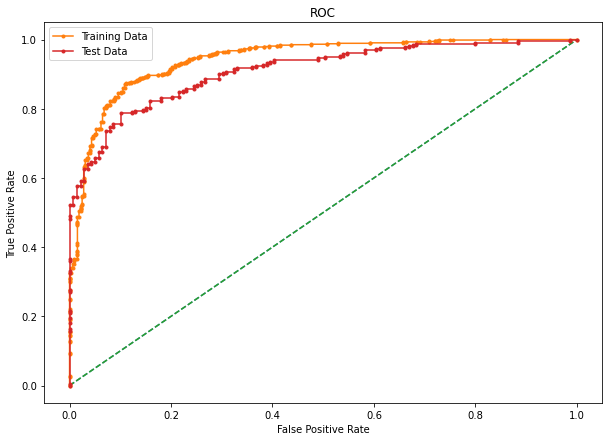

In [141]:
plt.figure(figsize=(10,7))
auc_GB_train = metrics.roc_auc_score(Y_train,ytrain_predict_prob_GB[:,1])
print('AUC for the Training Data: %.3f' % auc_GB_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_train,ytrain_predict_prob_GB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
auc_GB_test = metrics.roc_auc_score(Y_test,ytest_predict_prob_GB[:,1])
print('AUC for the Test Data: %.3f' % auc_GB_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
fpr, tpr, thresholds = metrics.roc_curve(Y_test,ytest_predict_prob_GB[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()


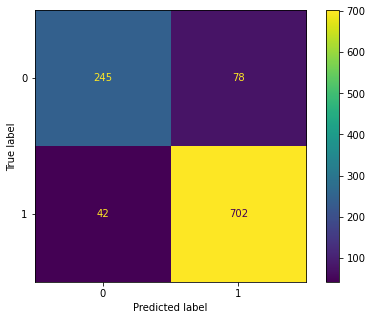

In [142]:
fig, ax = plt.subplots(figsize=(7,5))
plot_confusion_matrix(model_GB,X_train,Y_train, ax=ax);

In [143]:
confusion_matrix(Y_train, ytrain_predict_GB)


array([[245,  78],
       [ 42, 702]], dtype=int64)

In [144]:
print(classification_report(Y_train, ytrain_predict_GB),'\n')

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       323
           1       0.90      0.94      0.92       744

    accuracy                           0.89      1067
   macro avg       0.88      0.85      0.86      1067
weighted avg       0.89      0.89      0.89      1067
 



In [145]:
GB_train=classification_report(Y_train, ytrain_predict_GB,output_dict=True)
df=pd.DataFrame(GB_train).transpose()
GB_train_precision=round(df.loc["1"][0],2)
GB_train_recall=round(df.loc["1"][1],2)
GB_train_f1=round(df.loc["1"][2],2)
print ('GB_train_precision ',GB_train_precision)
print ('GB_train_recall ',GB_train_recall)
print ('GB_train_f1 ',GB_train_f1)

GB_train_precision  0.9
GB_train_recall  0.94
GB_train_f1  0.92


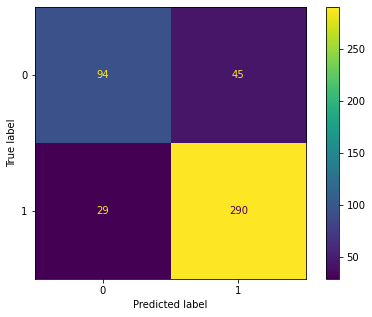

In [146]:
fig, ax = plt.subplots(figsize=(7,5))
plot_confusion_matrix(model_GB,X_test,Y_test, ax=ax);

In [147]:
confusion_matrix(Y_test, ytest_predict_GB)


array([[ 94,  45],
       [ 29, 290]], dtype=int64)

In [148]:
print(classification_report(Y_test, ytest_predict_GB),'\n')

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       139
           1       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.81      0.79      0.80       458
weighted avg       0.83      0.84      0.84       458
 



In [149]:
GB_test=classification_report(Y_test, ytest_predict_GB,output_dict=True)
df=pd.DataFrame(GB_test).transpose()
GB_test_precision=round(df.loc["1"][0],2)
GB_test_recall=round(df.loc["1"][1],2)
GB_test_f1=round(df.loc["1"][2],2)
print ('GB_test_precision ',GB_test_precision)
print ('GB_test_recall ',GB_test_recall)
print ('GB_test_f1 ',GB_test_f1)

GB_test_precision  0.87
GB_test_recall  0.91
GB_test_f1  0.89


In [150]:
index=['Accuracy', 'Area Under Curv', 'Precision','recall','F1 Score']
data = pd.DataFrame({'LogReg Train':[acc_LR_train,auc_lr_train,log_reg_train_precision,log_reg_train_recall,log_reg_train_f1],
        'LogReg Test':[acc_LR_test,auc_lr_test,log_reg_test_precision,log_reg_test_recall,log_reg_test_f1],
       'LDA Train':[acc_LDA_train,auc_lda_train,lin_dis_train_precision,lin_dis_train_recall,lin_dis_train_f1],
        'LDA Test':[acc_LDA_test,auc_lda_test,lin_dis_test_precision,lin_dis_test_recall,lin_dis_test_f1],
        'KNN Train':[KNN_acc_train,auc_KNN_train,KNN_train_precision,KNN_train_recall,KNN_train_f1],
        'KNN Test':[KNN_acc_test,auc_KNN_test,KNN_test_precision,KNN_test_recall,KNN_test_f1],
        'NB Train':[NB_acc_train,auc_NB_train,NB_train_precision,NB_train_recall,NB_train_f1],
        'NB Test':[NB_acc_test,auc_NB_test,NB_test_precision,NB_test_recall,NB_test_f1],
        'BGCL Train':[bgcl_acc_train,auc_bgcl_train,bgcl_train_precision,bgcl_train_recall,bgcl_train_f1],
        'BGCL Test':[bgcl_acc_test,auc_bgcl_test,bgcl_test_precision,bgcl_test_recall,bgcl_test_f1],         
        'ADB Train':[ADB_acc_train,auc_ADB_train,ADB_train_precision,ADB_train_recall,ADB_train_f1],
        'ADB Test':[ADB_acc_test,auc_ADB_test,ADB_test_precision,ADB_test_recall,ADB_test_f1],
        'GB Train':[GB_acc_train,auc_GB_train,GB_train_precision,GB_train_recall,GB_train_f1],
        'GB Test':[GB_acc_test,auc_GB_test,GB_test_precision,GB_test_recall,GB_test_f1]},index=index)
round(data,2)

,LogReg Train,LogReg Test,LDA Train,LDA Test,KNN Train,KNN Test,NB Train,NB Test,BGCL Train,BGCL Test,ADB Train,ADB Test,GB Train,GB Test
Accuracy,0.84,0.83,0.84,0.83,0.85,0.74,0.79,0.79,0.88,0.83,0.84,0.80,0.89,0.84
Area Under Curv,0.89,0.91,0.89,0.92,0.92,0.73,0.83,0.85,0.98,0.90,0.91,0.89,0.94,0.91
Precision,0.88,0.86,0.88,0.87,0.87,0.79,0.83,0.84,0.89,0.86,0.88,0.84,0.90,0.87
recall,0.90,0.90,0.90,0.89,0.93,0.85,0.87,0.87,0.95,0.91,0.90,0.89,0.94,0.91
F1 Score,0.89,0.88,0.89,0.88,0.90,0.82,0.85,0.85,0.92,0.88,0.89,0.86,0.92,0.89
